In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data=pd.read_csv('bengaluru.csv')
data.head()

,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date,Time
0,0,Bengaluru,01-01-2015 01:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,NaN,NaN,NaN,01-01-2015,01:00:00
1,1,Bengaluru,01-01-2015 02:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,12.13,NaN,4.54,NaN,NaN,NaN,01-01-2015,02:00:00
2,2,Bengaluru,01-01-2015 03:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,13.13,NaN,4.20,NaN,NaN,NaN,01-01-2015,03:00:00
3,3,Bengaluru,01-01-2015 04:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,11.82,NaN,4.63,NaN,NaN,NaN,01-01-2015,04:00:00
4,4,Bengaluru,01-01-2015 05:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,10.31,NaN,3.91,NaN,NaN,NaN,01-01-2015,05:00:00


In [3]:
data.shape

(48192, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48192 entries, 0 to 48191
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48192 non-null  int64  
 1   City        48192 non-null  object 
 2   Datetime    48192 non-null  object 
 3   PM2.5       43561 non-null  float64
 4   PM10        37205 non-null  float64
 5   NO          47569 non-null  float64
 6   NO2         47572 non-null  float64
 7   NOx         46104 non-null  float64
 8   NH3         40589 non-null  float64
 9   CO          43542 non-null  float64
 10  SO2         47447 non-null  float64
 11  O3          42956 non-null  float64
 12  Benzene     38128 non-null  float64
 13  Toluene     40993 non-null  float64
 14  Xylene      0 non-null      float64
 15  AQI         45497 non-null  float64
 16  AQI_Bucket  45497 non-null  object 
 17  Date        48192 non-null  object 
 18  Time        48192 non-null  object 
dtypes: float64(13), int64(1),

In [5]:
data.describe(include="all")

,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date,Time
count,48192.000000,48192,48192,43561.000000,37205.000000,47569.000000,47572.000000,46104.000000,40589.000000,43542.000000,47447.000000,42956.000000,38128.000000,40993.000000,0.0,45497.000000,45497,48192,48192
unique,NaN,1,48192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2009,24
top,NaN,Bengaluru,24-03-2019 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfactory,18-01-2015,23:00:00
freq,NaN,48192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26517,24,2008
mean,24095.500000,NaN,NaN,35.578011,82.527733,9.441072,28.057993,20.436661,21.599241,1.375805,5.477278,32.645345,2.345345,4.147976,NaN,94.407038,NaN,NaN,NaN
std,13911.976423,NaN,NaN,34.371171,48.681715,12.500519,19.238847,19.659542,16.127487,3.527313,6.437476,26.060167,10.953941,14.155784,NaN,49.298936,NaN,NaN,NaN
min,0.000000,NaN,NaN,0.010000,0.010000,0.030000,0.060000,0.000000,0.020000,0.000000,0.010000,0.080000,0.000000,0.000000,NaN,10.000000,NaN,NaN,NaN
25%,12047.750000,NaN,NaN,18.730000,50.160000,3.420000,15.880000,7.710000,13.160000,0.580000,3.300000,13.380000,0.350000,0.850000,NaN,64.000000,NaN,NaN,NaN
50%,24095.500000,NaN,NaN,28.580000,74.290000,5.870000,24.340000,16.880000,18.390000,0.810000,4.770000,25.210000,0.690000,1.540000,NaN,82.000000,NaN,NaN,NaN
75%,36143.250000,NaN,NaN,43.920000,105.010000,10.850000,34.520000,28.140000,25.380000,1.090000,6.320000,44.450000,1.470000,2.790000,NaN,109.000000,NaN,NaN,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket', 'Date', 'Time'],
      dtype='object')

In [7]:
data1=pd.DataFrame(data,columns={"City","Datetime","PM2.5","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI","AQI_Bucket","PM10","Date","Time"})

In [8]:
data1.head()

,Toluene,AQI_Bucket,NOx,PM10,PM2.5,Datetime,NO,CO,O3,Date,NO2,Xylene,AQI,Time,Benzene,SO2,City,NH3
0,3.43,NaN,7.58,NaN,NaN,01-01-2015 01:00,2.04,0.19,12.41,01-01-2015,12.40,NaN,NaN,01:00:00,0.56,4.05,Bengaluru,19.10
1,4.54,NaN,7.54,NaN,NaN,01-01-2015 02:00,2.20,0.21,12.13,01-01-2015,12.11,NaN,NaN,02:00:00,NaN,4.23,Bengaluru,17.81
2,4.20,NaN,6.52,NaN,NaN,01-01-2015 03:00,1.66,0.30,13.13,01-01-2015,10.82,NaN,NaN,03:00:00,NaN,4.28,Bengaluru,17.42
3,4.63,NaN,6.46,NaN,NaN,01-01-2015 04:00,1.92,0.13,11.82,01-01-2015,10.32,NaN,NaN,04:00:00,NaN,4.14,Bengaluru,16.86
4,3.91,NaN,6.22,NaN,NaN,01-01-2015 05:00,1.94,0.15,10.31,01-01-2015,9.82,NaN,NaN,05:00:00,NaN,4.26,Bengaluru,16.35


In [9]:
#chceking for null values
data1.isnull().sum()

Toluene        7199
AQI_Bucket     2695
NOx            2088
PM10          10987
PM2.5          4631
Datetime          0
NO              623
CO             4650
O3             5236
Date              0
NO2             620
Xylene        48192
AQI            2695
Time              0
Benzene       10064
SO2             745
City              0
NH3            7603
dtype: int64

In [10]:
#Checking % of the null values for each features
data1_percentage=(data1.isnull().sum()/48192)*100
data1_percentage

Toluene        14.938164
AQI_Bucket      5.592214
NOx             4.332669
PM10           22.798390
PM2.5           9.609479
Datetime        0.000000
NO              1.292746
CO              9.648904
O3             10.864874
Date            0.000000
NO2             1.286521
Xylene        100.000000
AQI             5.592214
Time            0.000000
Benzene        20.883134
SO2             1.545900
City            0.000000
NH3            15.776477
dtype: float64

* We are removing feature Xylene as all the values are null. 
* Here we are taking PM2.5 as a target variable and removing PM10.  

In [11]:
filtered_features_data=pd.DataFrame(data,columns={"City","Date","Time","PM2.5","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","AQI","AQI_Bucket"})

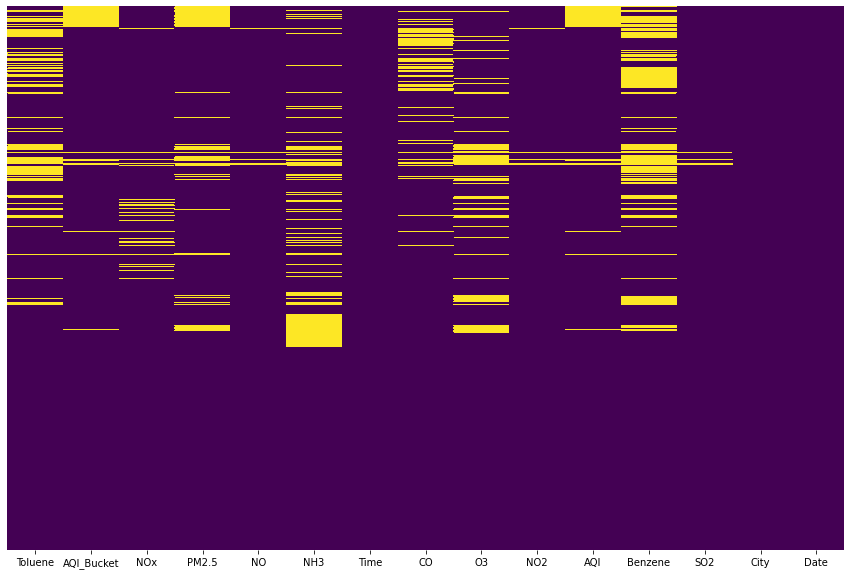

In [12]:
plt.figure(2, figsize = [15,10])
sns.heatmap(filtered_features_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
filtered_features_data.head()

,Toluene,AQI_Bucket,NOx,PM2.5,NO,NH3,Time,CO,O3,NO2,AQI,Benzene,SO2,City,Date
0,3.43,NaN,7.58,NaN,2.04,19.10,01:00:00,0.19,12.41,12.40,NaN,0.56,4.05,Bengaluru,01-01-2015
1,4.54,NaN,7.54,NaN,2.20,17.81,02:00:00,0.21,12.13,12.11,NaN,NaN,4.23,Bengaluru,01-01-2015
2,4.20,NaN,6.52,NaN,1.66,17.42,03:00:00,0.30,13.13,10.82,NaN,NaN,4.28,Bengaluru,01-01-2015
3,4.63,NaN,6.46,NaN,1.92,16.86,04:00:00,0.13,11.82,10.32,NaN,NaN,4.14,Bengaluru,01-01-2015
4,3.91,NaN,6.22,NaN,1.94,16.35,05:00:00,0.15,10.31,9.82,NaN,NaN,4.26,Bengaluru,01-01-2015


In [14]:
#Handling missing values
filtered_features_data['PM2.5']=filtered_features_data['PM2.5'].fillna(method='bfill')
filtered_features_data['Benzene']=filtered_features_data['Benzene'].fillna(method='ffill')
filtered_features_data['SO2']=filtered_features_data['SO2'].fillna(method='ffill')
filtered_features_data['NOx']=filtered_features_data['NOx'].fillna(method='ffill')
filtered_features_data['O3']=filtered_features_data['O3'].fillna(method='ffill')
filtered_features_data['AQI']=filtered_features_data['AQI'].fillna(method='bfill')
filtered_features_data['NO']=filtered_features_data['NO'].fillna(method='ffill')
filtered_features_data['Toluene']=filtered_features_data['Toluene'].fillna(method='ffill')
filtered_features_data['CO']=filtered_features_data['CO'].fillna(method='ffill')
filtered_features_data['NH3']=filtered_features_data['NH3'].fillna(method='bfill')
filtered_features_data['NO2']=filtered_features_data['NO2'].fillna(method='ffill')
filtered_features_data['AQI_Bucket']=filtered_features_data['AQI_Bucket'].fillna(method='bfill')

filtered_features_data.head()

,Toluene,AQI_Bucket,NOx,PM2.5,NO,NH3,Time,CO,O3,NO2,AQI,Benzene,SO2,City,Date
0,3.43,Satisfactory,7.58,14.12,2.04,19.10,01:00:00,0.19,12.41,12.40,82.0,0.56,4.05,Bengaluru,01-01-2015
1,4.54,Satisfactory,7.54,14.12,2.20,17.81,02:00:00,0.21,12.13,12.11,82.0,0.56,4.23,Bengaluru,01-01-2015
2,4.20,Satisfactory,6.52,14.12,1.66,17.42,03:00:00,0.30,13.13,10.82,82.0,0.56,4.28,Bengaluru,01-01-2015
3,4.63,Satisfactory,6.46,14.12,1.92,16.86,04:00:00,0.13,11.82,10.32,82.0,0.56,4.14,Bengaluru,01-01-2015
4,3.91,Satisfactory,6.22,14.12,1.94,16.35,05:00:00,0.15,10.31,9.82,82.0,0.56,4.26,Bengaluru,01-01-2015


In [15]:
filtered_features_data["Date"] = pd.to_datetime(filtered_features_data["Date"])

In [16]:
#Final features for model
df=pd.DataFrame(filtered_features_data,columns={'Benzene','SO2','NOx','O3','NO','Toluene','AQI','CO','NH3','NO2','PM2.5'})
df.head()

,Toluene,NOx,PM2.5,NO,O3,CO,NO2,AQI,Benzene,SO2,NH3
0,3.43,7.58,14.12,2.04,12.41,0.19,12.40,82.0,0.56,4.05,19.10
1,4.54,7.54,14.12,2.20,12.13,0.21,12.11,82.0,0.56,4.23,17.81
2,4.20,6.52,14.12,1.66,13.13,0.30,10.82,82.0,0.56,4.28,17.42
3,4.63,6.46,14.12,1.92,11.82,0.13,10.32,82.0,0.56,4.14,16.86
4,3.91,6.22,14.12,1.94,10.31,0.15,9.82,82.0,0.56,4.26,16.35


In [17]:
print("\t\t\t\t\tSample data")
print("Number of Rows in the data: ",df.shape[0],"\nNumber of Columns in the data: ",df.shape[1])

contvar=0
catvar=0
for i in range(0,(df.shape[1])):
    if((df.iloc[:,i].dtype == "int64") or (df.iloc[:,i].dtype == "int32") or (df.iloc[:,i].dtype == "float")):
        contvar+=1
    else:
        catvar+=1
print("\nTotal Continous variables: ",contvar,"\nTotal Categorical variables: ",catvar)

					Sample data
Number of Rows in the data:  48192 
Number of Columns in the data:  11

Total Continous variables:  11 
Total Categorical variables:  0


In [18]:
columns = list(df.columns)
uniq_col = []
nullcount = []
prim_col_rec = []
null_cols = []
negval_cols = []
    
for col in df.columns:
    uniq_col.append(df[col].nunique())
    if(df[col].nunique() == df.shape[0]):
        prim_col_rec.append(col)
    nullcount.append(df[col].isnull().sum())
    if(df[col].isnull().sum() > 0):
        null_cols.append(col)
    if(df[col].isnull().sum() > 0):
        null_cols.append(col)

pd.DataFrame(list(zip(columns,uniq_col, nullcount)), columns =['Column','Unique values','Null values']) 
print(" \nCount total NaN at each column in a DataFrame :\n\n", df.isnull().sum())
if(sum(nullcount)==0):
    print("No NULL values in any column")
else:
    print("Null Values found in columns:",null_cols)
    
if(len(prim_col_rec)<1):
    print("No primary level columns found")
else:
    print("Primary Level columns: ",prim_col_rec)

 
Count total NaN at each column in a DataFrame :

 Toluene    0
NOx        0
PM2.5      0
NO         0
O3         0
CO         0
NO2        0
AQI        0
Benzene    0
SO2        0
NH3        0
dtype: int64
No NULL values in any column
No primary level columns found


In [19]:
filtered_features_data.duplicated().sum()

0

In [20]:
filtered_features_data['AQI_Bucket'].value_counts()

Satisfactory    28733
Moderate        13003
Good             4448
Poor             1800
Severe            105
Very Poor         103
Name: AQI_Bucket, dtype: int64

In [21]:
X=pd.DataFrame(df,columns={'Benzene','SO2','NOx','O3','NO','Toluene','AQI','CO','NH3','NO2'})
y=pd.DataFrame(df,columns={"PM2.5"})                                                 

<Figure size 1080x720 with 0 Axes>

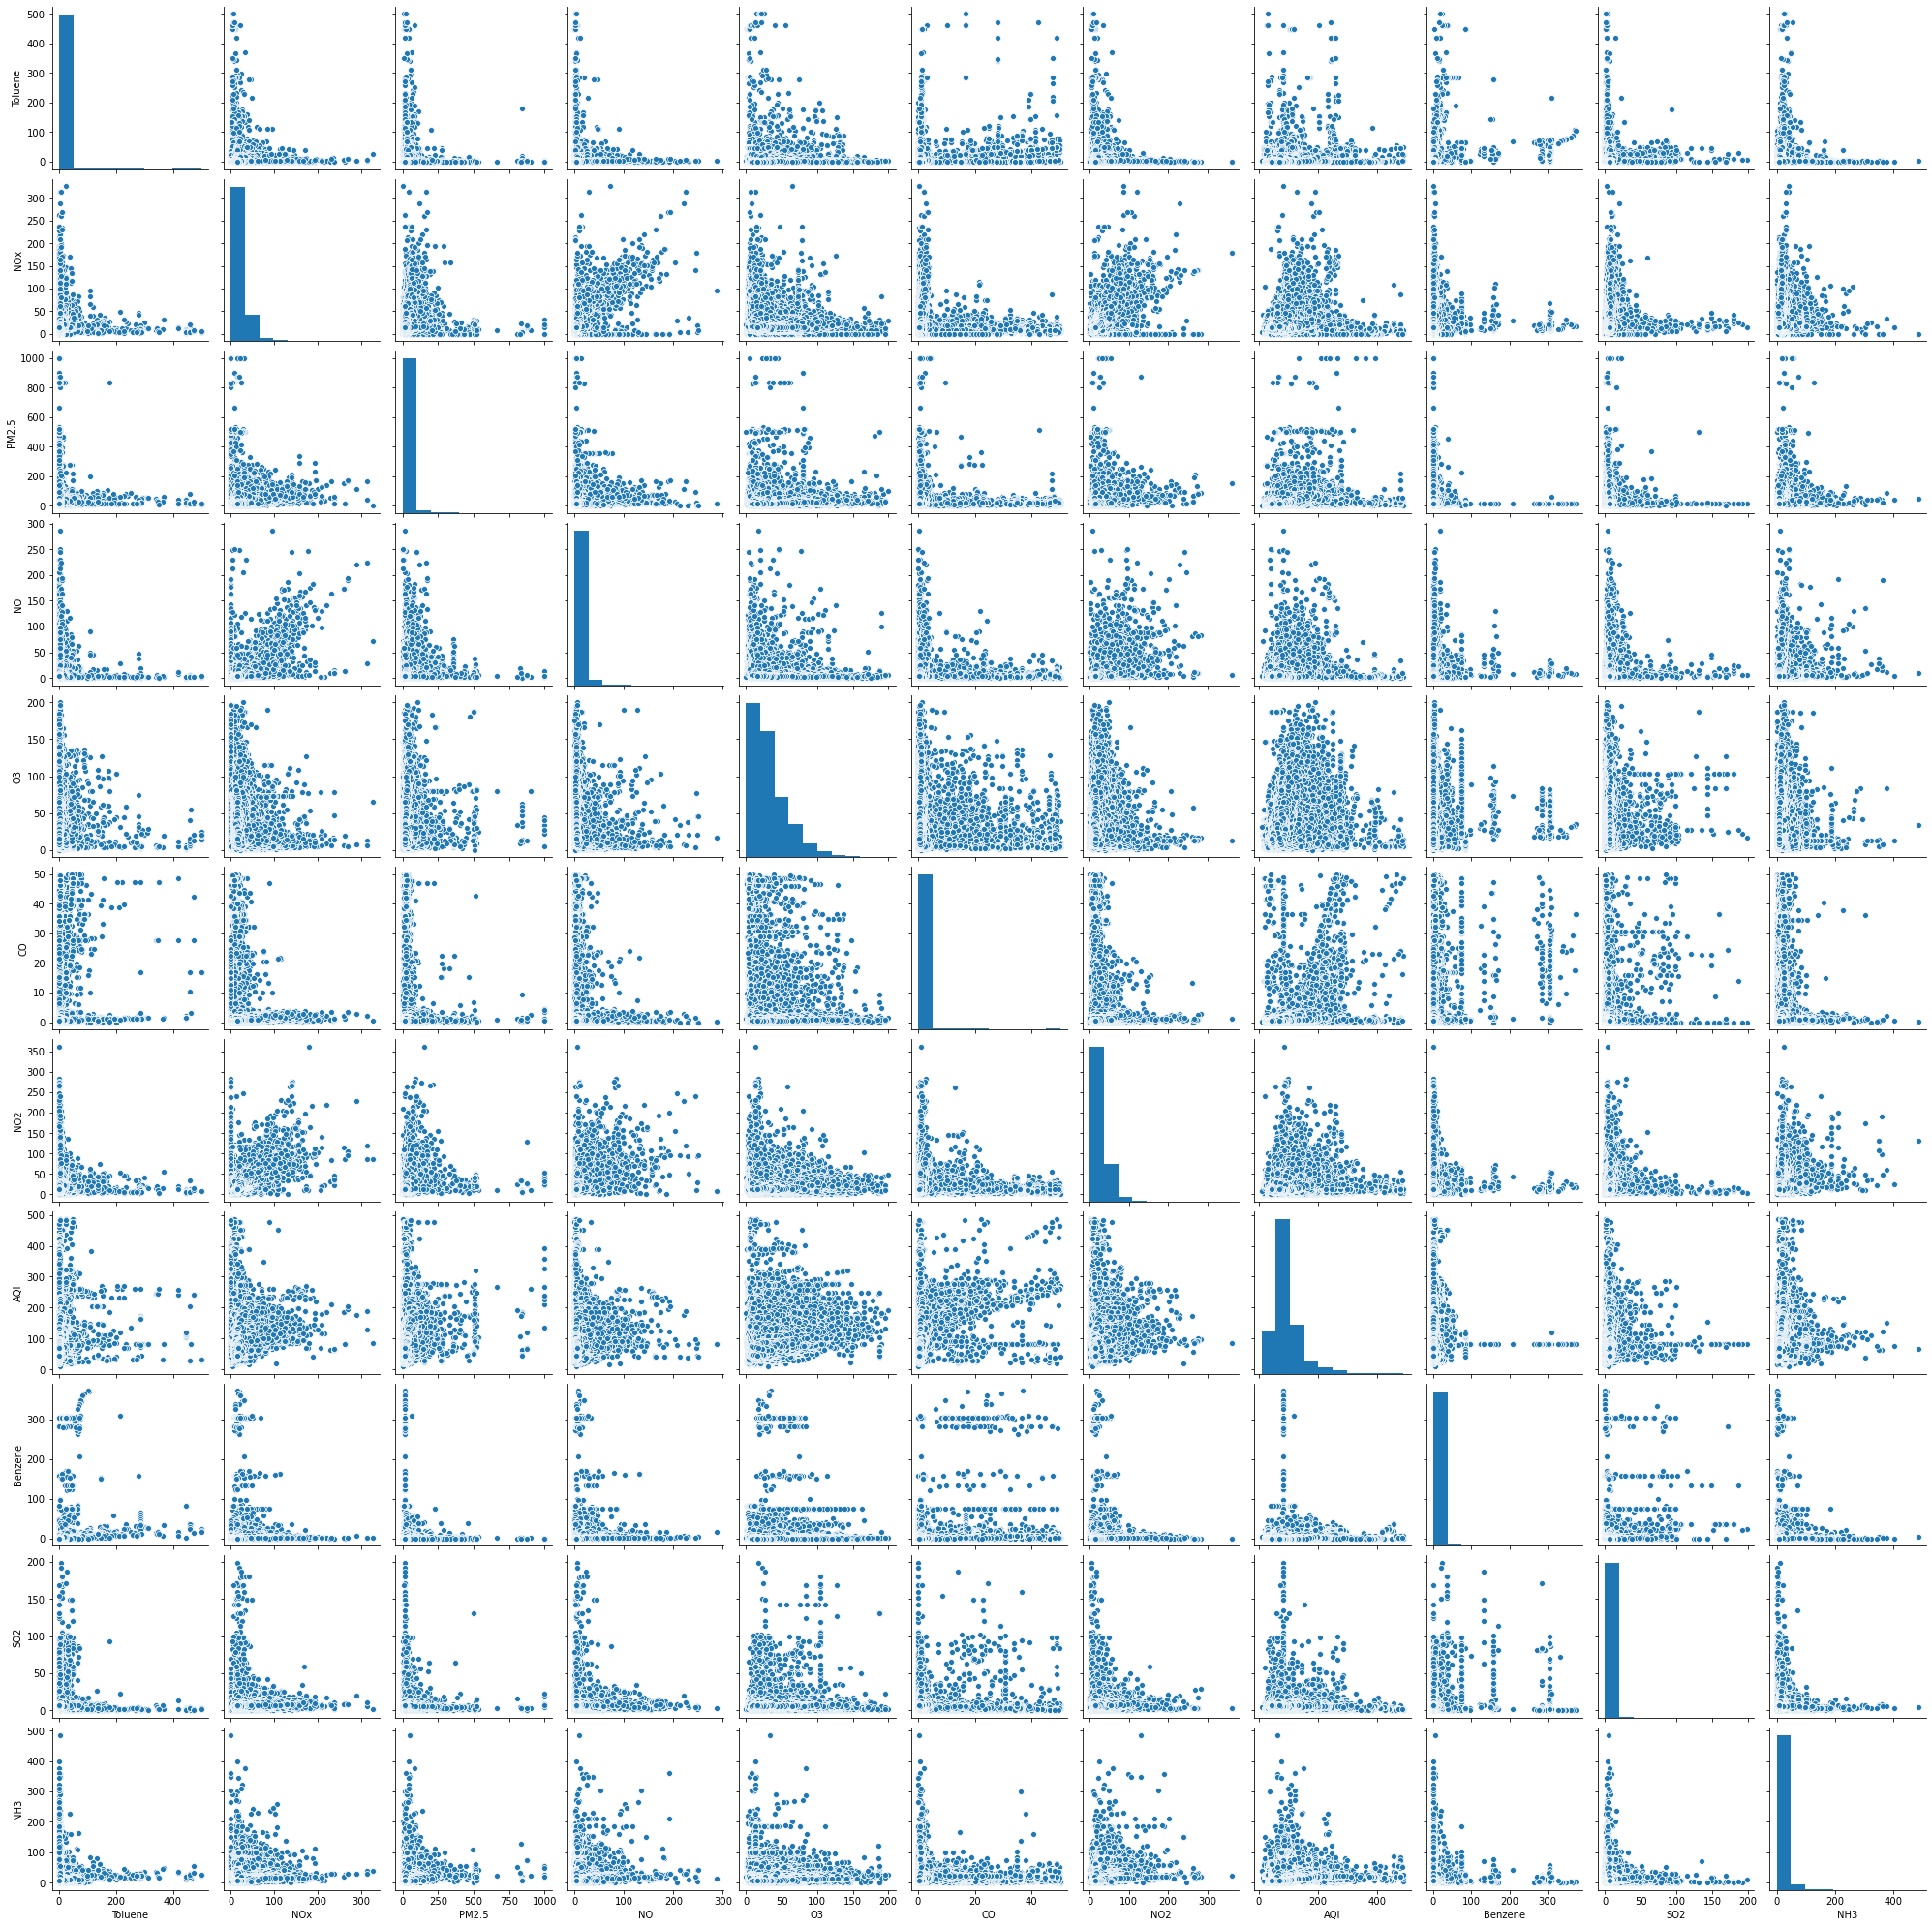

In [22]:
plt.figure(2, figsize = [15,10])
sns.pairplot(df)

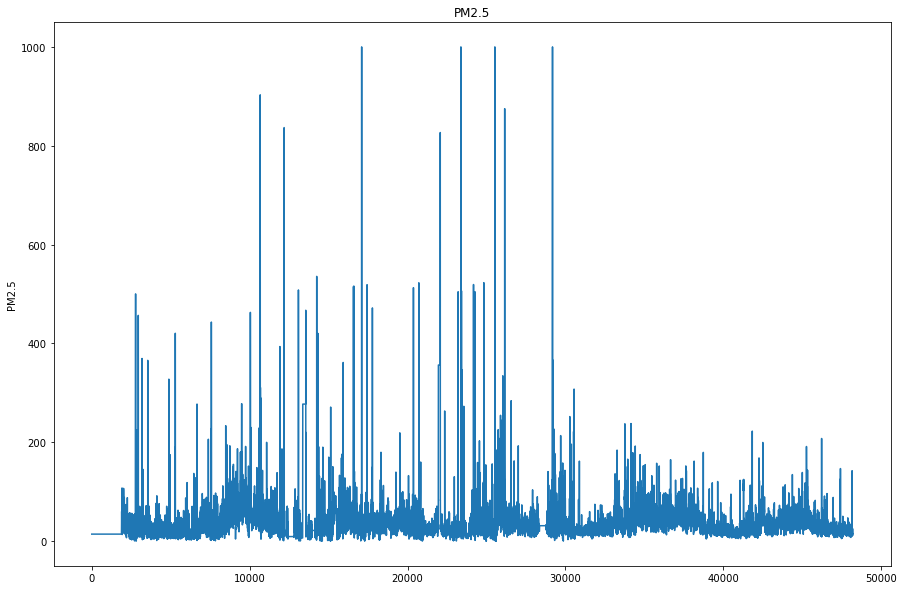

In [23]:
plt.figure(2, figsize = [15,10])
plt.plot(df.index, df['PM2.5'])
plt.title('PM2.5')
plt.ylabel('PM2.5');
plt.show()

In [24]:
df1=filtered_features_data.set_index('Date')
df1.head()

,Toluene,AQI_Bucket,NOx,PM2.5,NO,NH3,Time,CO,O3,NO2,AQI,Benzene,SO2,City
Date,,,,,,,,,,,,,,
2015-01-01,3.43,Satisfactory,7.58,14.12,2.04,19.10,01:00:00,0.19,12.41,12.40,82.0,0.56,4.05,Bengaluru
2015-01-01,4.54,Satisfactory,7.54,14.12,2.20,17.81,02:00:00,0.21,12.13,12.11,82.0,0.56,4.23,Bengaluru
2015-01-01,4.20,Satisfactory,6.52,14.12,1.66,17.42,03:00:00,0.30,13.13,10.82,82.0,0.56,4.28,Bengaluru
2015-01-01,4.63,Satisfactory,6.46,14.12,1.92,16.86,04:00:00,0.13,11.82,10.32,82.0,0.56,4.14,Bengaluru
2015-01-01,3.91,Satisfactory,6.22,14.12,1.94,16.35,05:00:00,0.15,10.31,9.82,82.0,0.56,4.26,Bengaluru


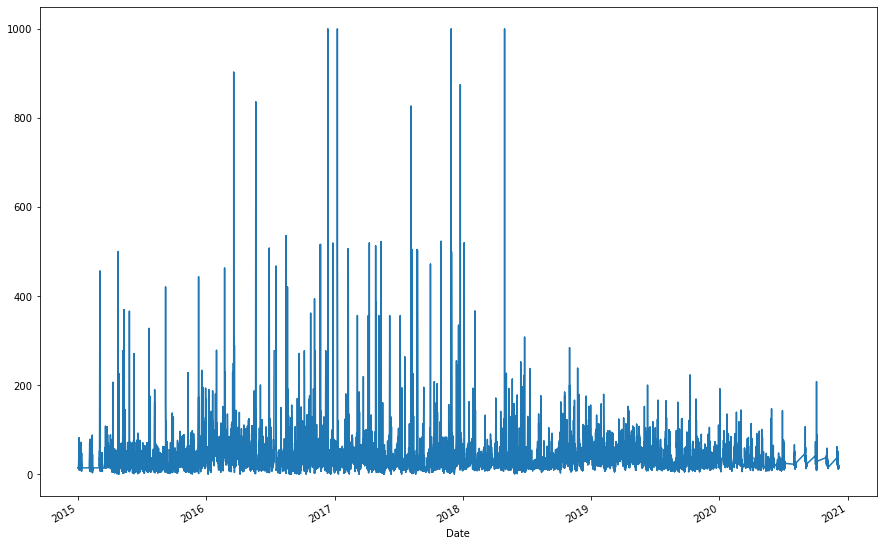

In [25]:
plt.figure(2, figsize = [15,10])
df1["PM2.5"].plot()

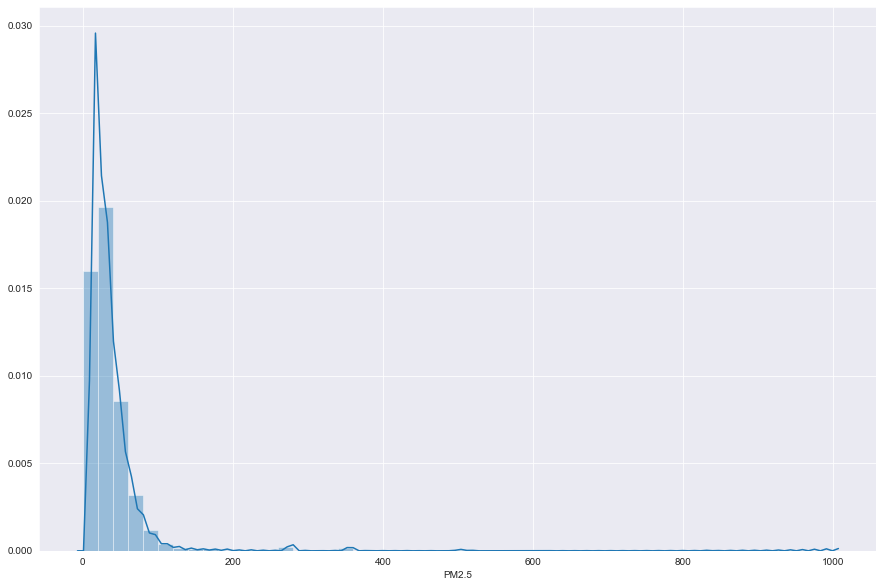

In [26]:
plt.figure(2, figsize = [15,10])
sns.set_style('darkgrid')
sns.distplot(df["PM2.5"])

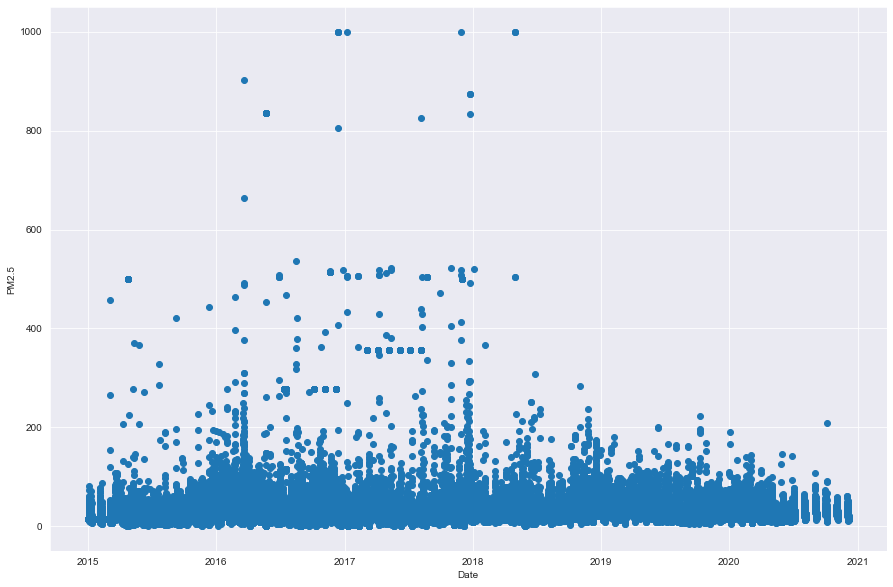

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(filtered_features_data['Date'], filtered_features_data['PM2.5'])
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
plt.show()

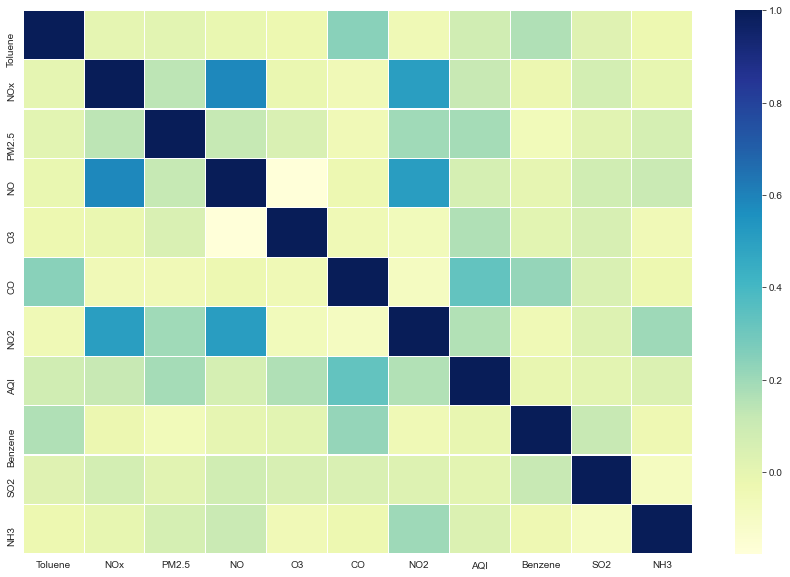

In [28]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize =(15, 10)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [29]:
corr_matrix.index

Index(['Toluene', 'NOx', 'PM2.5', 'NO', 'O3', 'CO', 'NO2', 'AQI', 'Benzene',
       'SO2', 'NH3'],
      dtype='object')

# Feature Importance

In [30]:
model=ExtraTreesRegressor()
model.fit(X,y.values.ravel())

ExtraTreesRegressor()

In [31]:
X.head()

,Toluene,NOx,NO,O3,CO,NO2,AQI,Benzene,SO2,NH3
0,3.43,7.58,2.04,12.41,0.19,12.40,82.0,0.56,4.05,19.10
1,4.54,7.54,2.20,12.13,0.21,12.11,82.0,0.56,4.23,17.81
2,4.20,6.52,1.66,13.13,0.30,10.82,82.0,0.56,4.28,17.42
3,4.63,6.46,1.92,11.82,0.13,10.32,82.0,0.56,4.14,16.86
4,3.91,6.22,1.94,10.31,0.15,9.82,82.0,0.56,4.26,16.35


In [32]:
print(model.feature_importances_)

[0.11353797 0.08131534 0.07650173 0.10620521 0.07962319 0.08576746
 0.16628999 0.07404124 0.07902733 0.13769054]


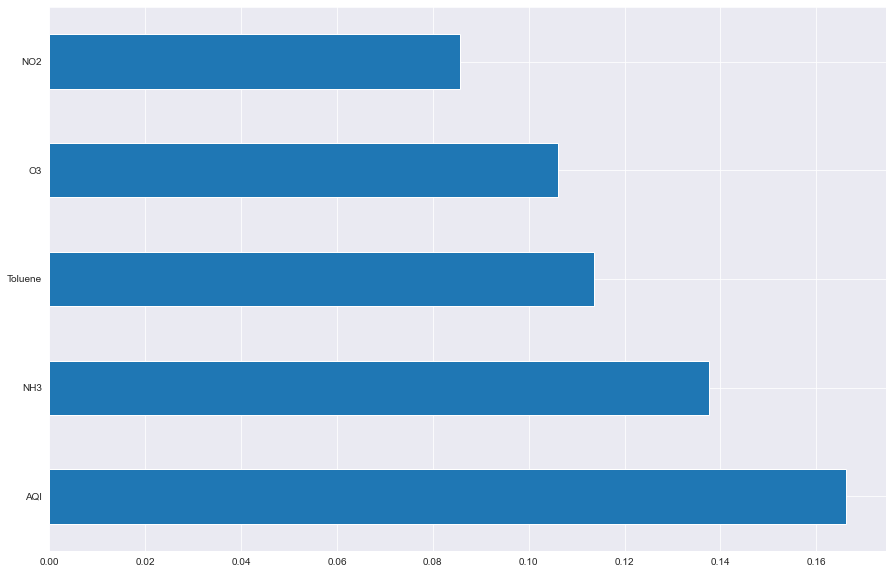

In [33]:
#plot graph of feature importances for better visualization
plt.figure(2, figsize = [15,10])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

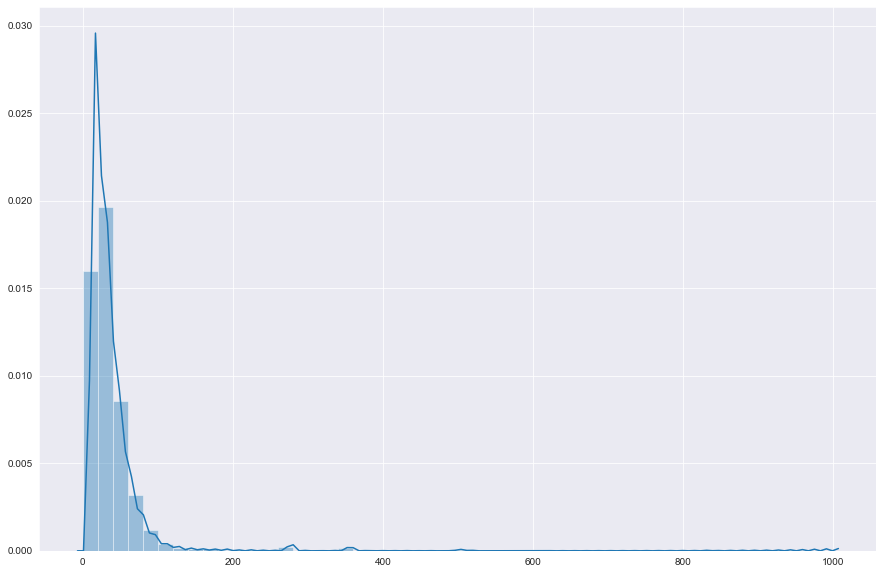

In [34]:
plt.figure(2, figsize = [15,10])
sns.distplot(y)

# linear regression<br/>
* spliting the dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
regressor.coef_

array([[ 0.08799419,  0.06731533,  0.06635975,  0.04902372, -0.72304168,
         0.30183483,  0.15949324, -0.08315324,  0.08148789,  0.07363523]])

In [38]:
regressor.intercept_

array([9.00411909])

* Model Evaluation

In [39]:
prediction=regressor.predict(X_test)

In [40]:
data_prediction=pd.DataFrame(prediction,columns={"Predicted_PM2.5"})
data_prediction.head()

,Predicted_PM2.5
0,25.513842
1,36.319040
2,25.831900
3,38.347742
4,43.400799


In [41]:
data_prediction.shape

(14458, 1)

In [42]:
y_test.shape

(14458, 1)

In [43]:
y_test.head()

,PM2.5
46612,21.32
38143,41.83
2675,22.47
3311,21.14
44169,62.46


In [44]:
y_test1=y_test.copy()

In [45]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns={"PM2.5"})
y_test2.head()

,PM2.5
0,21.32
1,41.83
2,22.47
3,21.14
4,62.46


In [46]:
df_row_merged = pd.concat([y_test2,data_prediction],axis=1)
df_row_merged.head(10)

,PM2.5,Predicted_PM2.5
0,21.32,25.513842
1,41.83,36.319040
2,22.47,25.831900
3,21.14,38.347742
4,62.46,43.400799
5,22.97,26.312636
6,11.69,27.315348
7,43.67,31.154867
8,18.80,31.684514
9,17.26,28.075951


In [80]:
df_row_merged['Accuracy']= abs((df_row_merged['PM2.5']-df_row_merged['Predicted_PM2.5'])/df_row_merged['PM2.5'])*100
df_row_merged.head(10)

,PM2.5,Predicted_PM2.5,Accuracy
0,21.32,25.513842,19.670927
1,41.83,36.319040,13.174660
2,22.47,25.831900,14.961727
3,21.14,38.347742,81.398968
4,62.46,43.400799,30.514250
5,22.97,26.312636,14.552181
6,11.69,27.315348,133.664229
7,43.67,31.154867,28.658421
8,18.80,31.684514,68.534649
9,17.26,28.075951,62.664840


Text(0.5, 1.0, 'Actual and Predicted Values')

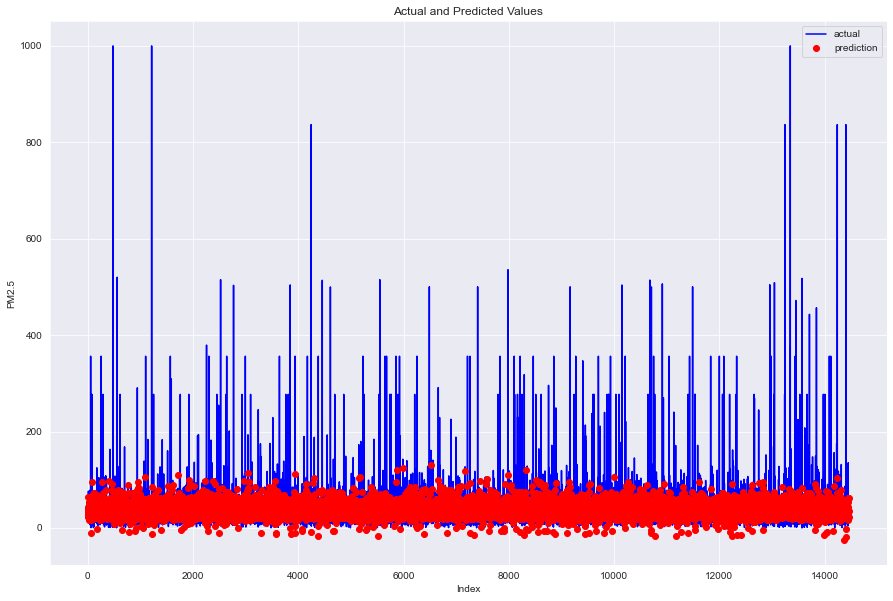

In [47]:
plt.figure(2, figsize = [15,10])
plt.plot(df_row_merged.index, df_row_merged['PM2.5'], 'b-', label = 'actual')
plt.plot(df_row_merged.index, df_row_merged['Predicted_PM2.5'], 'ro', label = 'prediction')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual and Predicted Values')

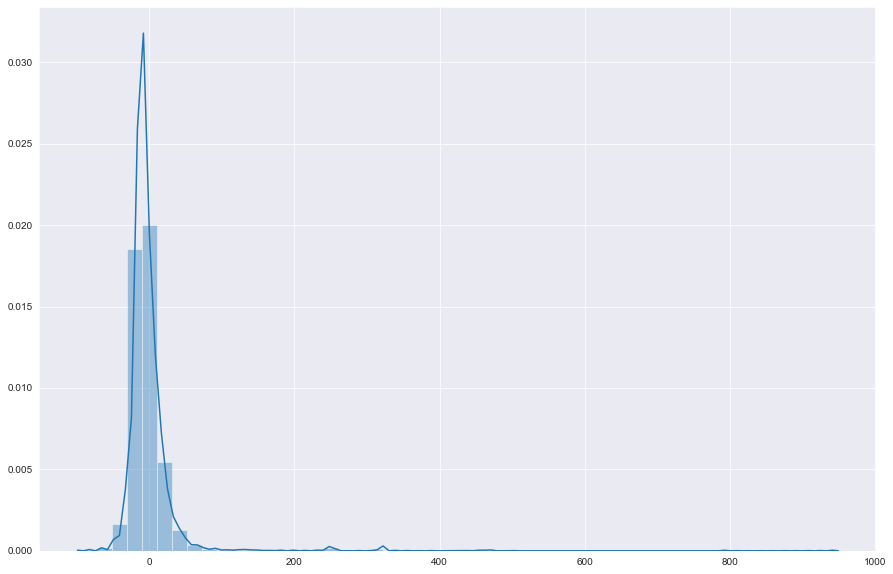

In [48]:
plt.figure(2, figsize = [15,10])
sns.distplot(y_test-prediction)

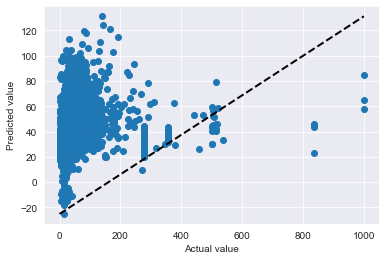

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_test2,data_prediction)
ax.plot([y_test2.min(), y_test2.max()], [data_prediction.min(), data_prediction.max()], 'k--', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
plt.show()

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 17.424654196614966
MSE: 1633.8829998919164
RMSE: 40.4213186312856


# decision tree

In [51]:
dtree=DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
dtreePrediction=dtree.predict(X_test)
dtreePrediction

array([19.22, 47.04,  1.3 , ..., 72.47, 13.49, 40.91])

In [53]:
dtreePrediction_data=pd.DataFrame(dtreePrediction,columns={"PredictedPM2.5"})
dtreePrediction_data.head()

,PredictedPM2.5
0,19.22
1,47.04
2,1.30
3,25.74
4,75.22


In [54]:
df_row_merged_dtree = pd.concat([dtreePrediction_data,y_test2],axis=1)
df_row_merged_dtree.head(10)

,PredictedPM2.5,PM2.5
0,19.22,21.32
1,47.04,41.83
2,1.30,22.47
3,25.74,21.14
4,75.22,62.46
5,5.37,22.97
6,25.47,11.69
7,43.67,43.67
8,20.17,18.80
9,20.68,17.26


In [81]:
df_row_merged_dtree['Accuracy']= abs((df_row_merged_dtree['PM2.5']-df_row_merged_dtree['PredictedPM2.5'])/df_row_merged_dtree['PM2.5'])*100
df_row_merged_dtree.head(10)

,PredictedPM2.5,PM2.5,Accuracy
0,19.22,21.32,9.849906
1,47.04,41.83,12.455176
2,1.30,22.47,94.214508
3,25.74,21.14,21.759697
4,75.22,62.46,20.429075
5,5.37,22.97,76.621680
6,25.47,11.69,117.878529
7,43.67,43.67,0.000000
8,20.17,18.80,7.287234
9,20.68,17.26,19.814600


Text(0.5, 1.0, 'Actual and Predicted Values')

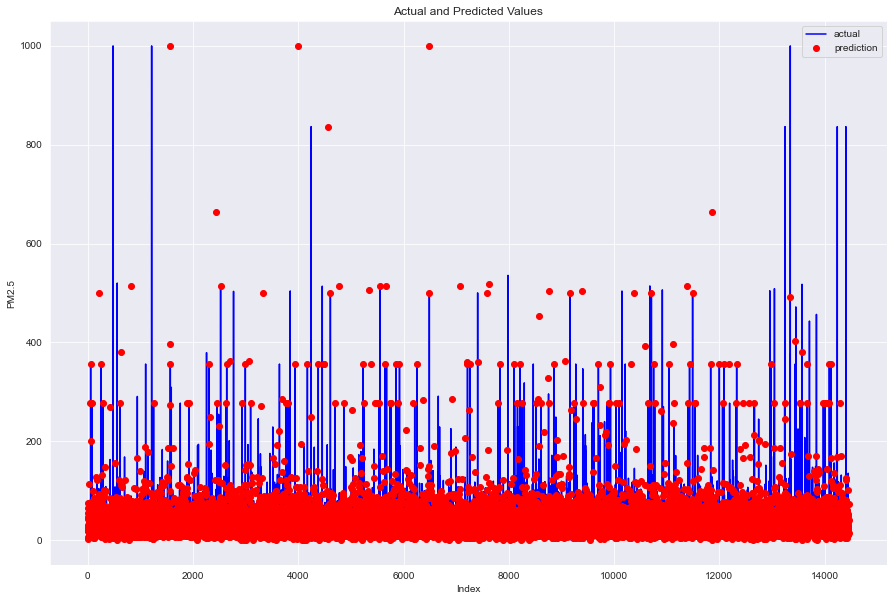

In [55]:
plt.figure(2, figsize = [15,10])
plt.plot(df_row_merged_dtree.index, df_row_merged_dtree['PM2.5'], 'b-', label = 'actual')
plt.plot(df_row_merged_dtree.index, df_row_merged_dtree['PredictedPM2.5'], 'ro', label = 'prediction')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual and Predicted Values')

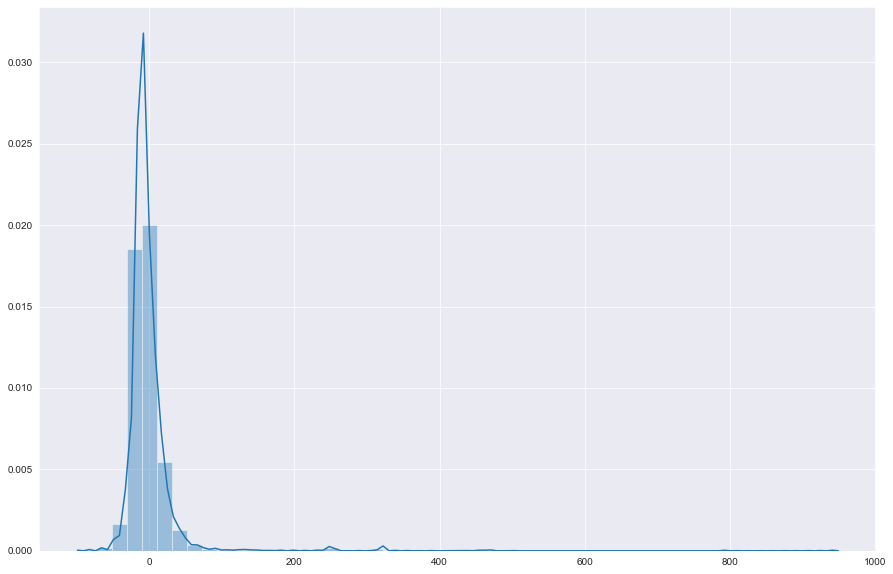

In [56]:
plt.figure(2, figsize = [15,10])
sns.distplot(y_test2-prediction)

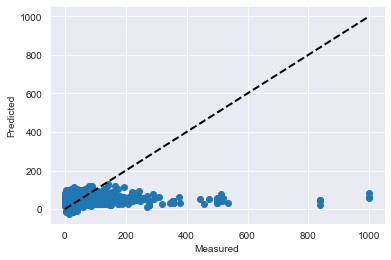

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test2,data_prediction)
ax.plot([y_test2.min(), y_test2.max()], [dtreePrediction_data.min(), dtreePrediction_data.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, dtreePrediction))
print('MSE:', metrics.mean_squared_error(y_test, dtreePrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtreePrediction)))

MAE: 15.39981463549592
MSE: 1826.0784532162127
RMSE: 42.73263920256053


# Random forest

In [59]:
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train.values.ravel())

RandomForestRegressor()

In [60]:
randomforest_prediction=randomforest.predict(X_test)
randomforest_prediction_data=pd.DataFrame(randomforest_prediction,columns={"PredictedPM2.5"})
randomforest_prediction_data.head()

,PredictedPM2.5
0,20.7727
1,49.3818
2,97.5996
3,38.1520
4,52.2239


In [61]:
df_row_merged_randomforest = pd.concat([y_test2,randomforest_prediction_data],axis=1)
df_row_merged_randomforest.tail(10)

,PM2.5,PredictedPM2.5
14448,47.92,46.0098
14449,135.28,102.4927
14450,20.02,26.1342
14451,46.90,39.6212
14452,22.09,23.6368
14453,60.13,61.2702
14454,10.49,15.8517
14455,49.39,102.6995
14456,12.73,14.2780
14457,23.62,37.3720


In [ ]:
df_row_merged_dtree['Error %']= abs((df_row_merged_dtree['PM2.5']-df_row_merged_dtree['PredictedPM2.5'])/df_row_merged_dtree['PM2.5'])*100
df_row_merged_dtree.head(10)

Text(0.5, 1.0, 'Actual and Predicted Values')

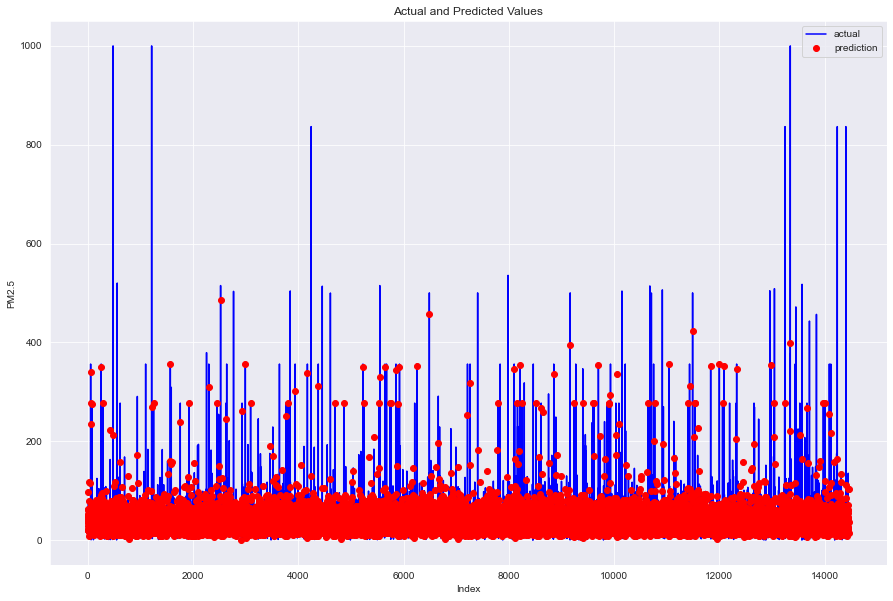

In [62]:
plt.figure(2, figsize = [15,10])
plt.plot(df_row_merged_randomforest.index, df_row_merged_randomforest['PM2.5'], 'b-', label = 'actual')
plt.plot(df_row_merged_randomforest.index, df_row_merged_randomforest['PredictedPM2.5'], 'ro', label = 'prediction')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual and Predicted Values')

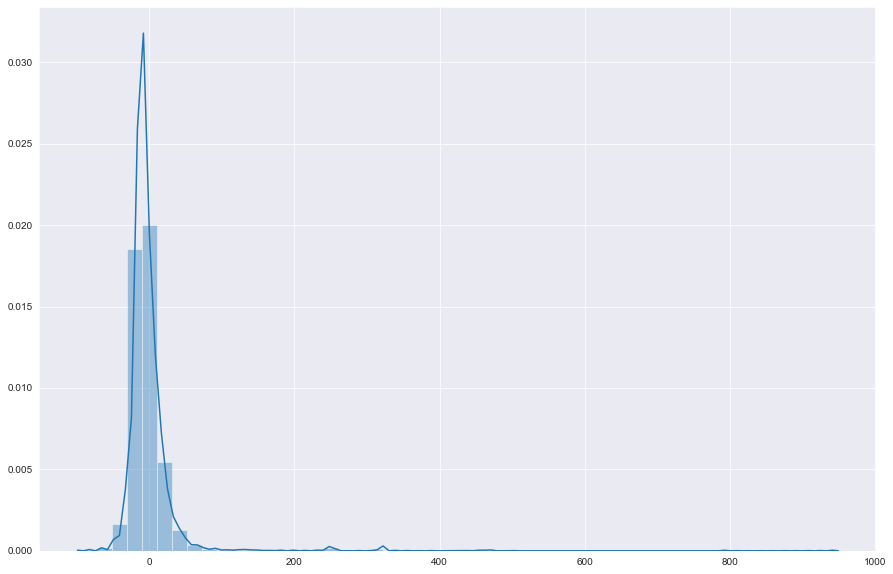

In [63]:
plt.figure(2, figsize = [15,10])
sns.distplot(y_test-prediction)

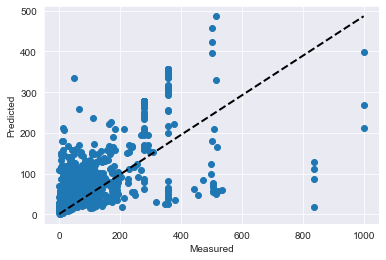

In [64]:
fig, ax = plt.subplots()
ax.scatter(y_test2, randomforest_prediction_data)
ax.plot([y_test2.min(), y_test2.max()], [randomforest_prediction_data.min(), randomforest_prediction_data.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, randomforest_prediction))
print('MSE:', metrics.mean_squared_error(y_test, randomforest_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, randomforest_prediction)))

MAE: 11.537067973555589
MSE: 879.8413091272864
RMSE: 29.662119093673777


# KNN

In [66]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [67]:
knn_prediction=regressor.predict(X_test)

In [68]:
knn_prediction=pd.DataFrame(knn_prediction,columns={"PredictedPM2.5"})
knn_prediction.head()

,PredictedPM2.5
0,21.40
1,42.23
2,5.42
3,22.64
4,61.45


In [69]:
df_row_merged_knn = pd.concat([y_test2,knn_prediction],axis=1)
df_row_merged_knn.head(10)

,PM2.5,PredictedPM2.5
0,21.32,21.40
1,41.83,42.23
2,22.47,5.42
3,21.14,22.64
4,62.46,61.45
5,22.97,20.60
6,11.69,11.24
7,43.67,43.67
8,18.80,22.73
9,17.26,25.88


Text(0.5, 1.0, 'Actual and Predicted Values')

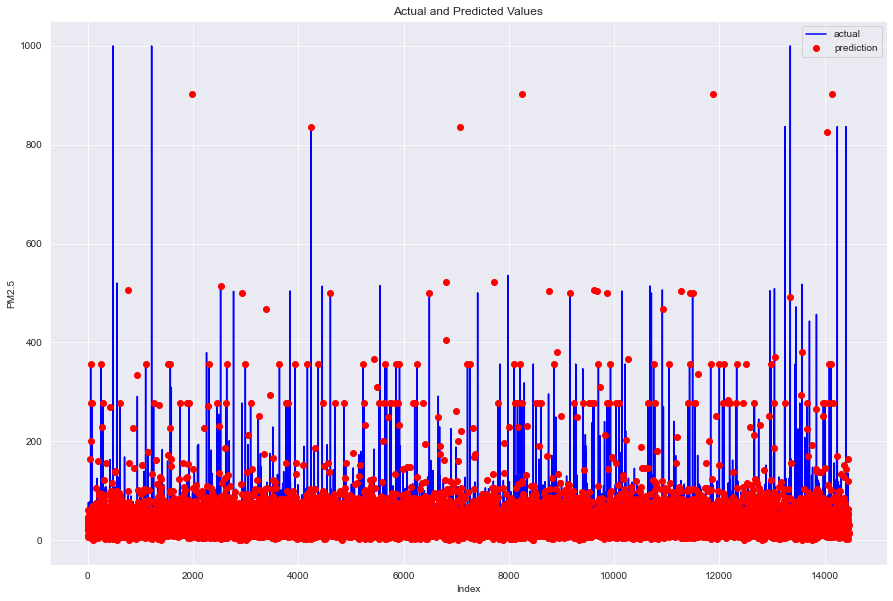

In [70]:
plt.figure(2, figsize = [15,10])
plt.plot(df_row_merged_randomforest.index, df_row_merged_knn['PM2.5'], 'b-', label = 'actual')
plt.plot(df_row_merged_randomforest.index, df_row_merged_knn['PredictedPM2.5'], 'ro', label = 'prediction')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual and Predicted Values')

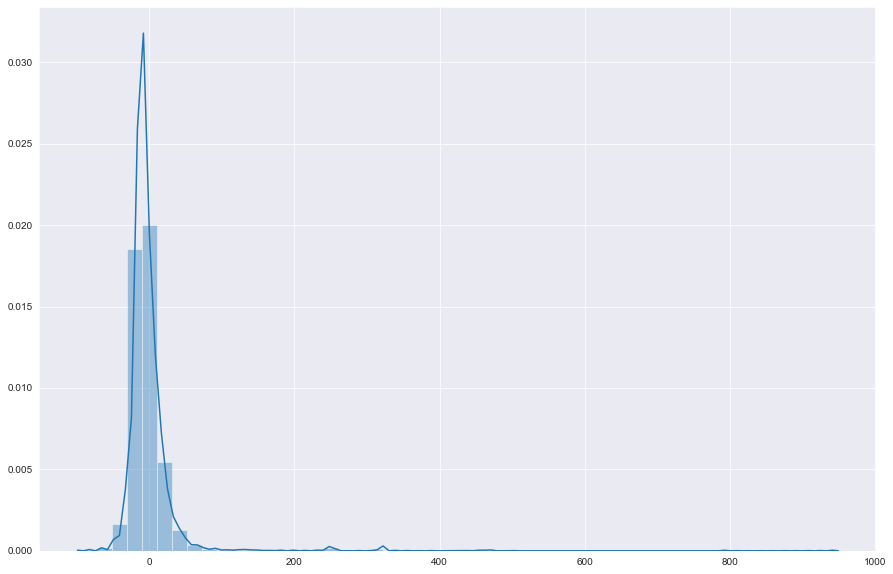

In [71]:
plt.figure(2, figsize = [15,10])
sns.distplot(y_test-prediction)

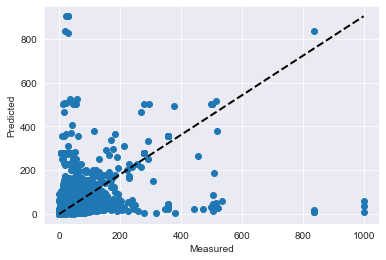

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test2, knn_prediction)
ax.plot([y_test2.min(), y_test2.max()], [knn_prediction.min(), knn_prediction.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, knn_prediction))
print('MSE:', metrics.mean_squared_error(y_test, knn_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_prediction)))

MAE: 13.576567990040115
MSE: 1660.8229458984645
RMSE: 40.75319552990249
